In [1137]:
#import
import tweepy
import requests
import os
import pandas as pd
import json
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='ebrahim94', api_key='30tuPUZ3ci0J9PS1UEAo')
import seaborn as sns
import matplotlib.pyplot as plt

### Gathering Data

In [997]:
#authenticate twitters API
consumer_key = '0wnVL9bxLug24uCu8F7X3Egm9'
consumer_secret = 'UZyxY8CMrnI8RdpQWII7XKs0U98fYVfAAh1Bo29QGRqdI44D73'
access_token = '969994931430293504-oy0FT18V3bWOrrHSJdERtIR18p4aXwF'
access_secret = 'IaQnRyQEhNd1UZ1X5NRX1pNtUbj6G21zrhV9bTRrIJZOl'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [528]:
#Download file programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [529]:
#create path
folder_name = 'download_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [530]:
#download file to path
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [531]:
#get csv
df = pd.read_csv('twitter-archive-enhanced.csv')

In [532]:
#create file
with open('data.txt', 'a', encoding = 'utf8') as outfile:
    for ids in df['tweet_id']:
        try:
            tweet = api.get_status(ids, tweet_mode = 'extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 627
Rate limit reached. Sleeping for: 645


In [533]:
#import and read tweet_json
file = open('data.txt', 'r')
tweets = []

for line in file:
    try:
        tweet = json.loads(line)
        tweets.append(tweet)
    except:
        continue

file.close()

In [998]:
#create a dataframe using the json data
tweet_info = pd.DataFrame()

tweet_info['tweet_id']= list(map(lambda tweet:tweet['id'], tweets))
tweet_info['retweet_count'] = list(map(lambda tweet:tweet['retweet_count'], tweets))
tweet_info['favorite_count'] = list(map(lambda tweet:tweet['favorite_count'], tweets))

### Assesing

I am now going to assess the data collected visually and programatically in order to see if there are any quality or structural issues. 

Data Quality Dimensions:<br>
Completness<br>
Validity<br>
Accuracy <br>
Consistency<br>

###### Assesment of the twitter archive dataframe

In [999]:
#returns the first 5 rows by default
df.head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

in_reply_to_status_id, in_reply_to_user_id, retweet_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns are mostly composed of NaN values which stands for not a number. 

<span style = 'color:red'>Quality: remove the columns with mostly NaN values</span>

In [1000]:
#returns the last 5 rows by default
df.tail(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000022159362/photo/1,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.co

Using the tail function on the dataframe we see that the columns who have mostly NaN values in the first few rows of the dataframe have NaN values in the last few rows of the dataframe. From this visual assesment we can infer that these columns hold mostly NaN values.

In the last few rows of the dataframe the dog column which is the name of the dog that the tweet is about is either none or 'the', 'a' or 'an'. By looking at the text I conjecture that the value of the dog column is derived by looking for the string 'This is' and extracting the next word after it.

<span style = 'color:red'>Quality: Name of the dog should be a name or Null not an article</span>

The last 4 columns of the dataframe (doggo, floofer, pupper, and puppo) collectively have only one value than is not none. This is not tidy, the way we can address this is by melting the 4 columns.

<span style = 'color:red'>structual: Melt the 4 columns to one column containing the 'class' which the subject belongs to.</span>

In [1001]:
df.shape

(2356, 17)

In [1002]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

df.shape returns the numbers of columns and rows in the datframe. The number of rows in the dataframe is 2,356 and thus a column which has a value for each row should have 2,356 non null values. In this dataframe 6 out of the 17 columns have missing values.

To be able to use timestamp column it is wise to convert the values in that column to a datetime object.

<span style = 'color:red'>Quality: convert timestamp into a datetime object</span>

Tweet id is an integer, this is not useful since we do not want to operate on the values of this column.

<span style = 'color:red'>Quality: convert tweet id to an object</span>

In [1003]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1004]:
#number of rows where the numerator is smaller than the denominator
df.query('rating_numerator < rating_denominator').shape[0]

442

In [1005]:
#look at a few of these rows
df.query('rating_numerator < rating_denominator').head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541936185344/photo/1,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">T

In [1006]:
#looking at the text which was used to extract the ratings to understand why we have a numerator that is less than 10
print(df.text[45] + "\n" + df.expanded_urls[883])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
https://twitter.com/dog_rates/status/760252756032651264/photo/1


442 out of 2356 columns have numerators that are lower than the denominator. In this twitter page the convention is to have a numerator that is larger than the denominator, the denominator is usually 10 and it is unusual to have a denominator that has a value other than 10. Upon exploring the rows that have these unconventional ratings I have found that the reason for these are:

<span style = 'color:blue'>The Image that is being rated is not that of a dog but of another animal/object for example rows 605, 462 and 599</span>

<span style = 'color:blue'>The text column for that row contains the wrong information for example row 342</span>

<span style = 'color:blue'>A lot of the time it is the rating given to the dog such as in row 2347</span>

<span style = 'color:blue'>The value is not an integer such as in row 45</span>

<span style = 'color:red'>Quality: make sure the rating is what the original poster inputed</span>


In [1007]:
df.source.nunique(), df.source.value_counts()

(4,
 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
 <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
 <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
 <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
 Name: source, dtype: int64)

The source column has 4 unique value, it is better to name the source rather than provide a link. Although the data is accurate it is not that easy for humans to read

<span style = 'color:red'>Quality: Make the values of the source column more readable</span>

#### Assessing the image predictions dataset

In [1008]:
#read the file that was programatically downloaded during the gather step
image_predictions = pd.read_csv('download_folder/image-predictions.tsv', sep = '\t')

In [1009]:
image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1010]:
image_predictions.tail(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [1011]:
image_predictions.shape

(2075, 12)

In [1012]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1013]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1014]:
tweet_info.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8314,38014
1,892177421306343426,6142,32631
2,891815181378084864,4066,24560
3,891689557279858688,8459,41364
4,891327558926688256,9158,39544
5,891087950875897856,3048,19863
6,890971913173991426,2019,11613
7,890729181411237888,18442,64148
8,890609185150312448,4182,27288
9,890240255349198849,7213,31307


In [1015]:
tweet_info.tail()

,tweet_id,retweet_count,favorite_count
4671,666049248165822465,41,106
4672,666044226329800704,139,292
4673,666033412701032449,43,123
4674,666029285002620928,47,126
4675,666020888022790149,501,2531


In [1016]:
tweet_info.shape

(4676, 3)

In [1017]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 3 columns):
tweet_id          4676 non-null int64
retweet_count     4676 non-null int64
favorite_count    4676 non-null int64
dtypes: int64(3)
memory usage: 109.7 KB


In [1018]:
tweet_info.describe()

,tweet_id,retweet_count,favorite_count
count,4.676000e+03,4676.000000,4676.000000
mean,7.422385e+17,2928.693328,7960.016467
std,6.833337e+16,4932.775645,12327.333107
min,6.660209e+17,0.000000,0.000000
25%,6.783411e+17,587.000000,1371.000000
50%,7.186224e+17,1367.000000,3457.500000
75%,7.986979e+17,3411.500000,9737.500000
max,8.924206e+17,83599.000000,164197.000000


In [1019]:
tweet_info[tweet_info.duplicated()]

,tweet_id,retweet_count,favorite_count
2367,886267009285017600,4,116
2369,886054160059072513,105,0
2392,881633300179243008,7,124
2401,879674319642796034,10,305
2410,878404777348136964,1267,0
2415,877611172832227328,79,0
2433,873337748698140672,1564,0
2448,870726314365509632,3,119
2458,868639477480148993,2097,0
2464,867072653475098625,121,0


tweet_info is a dataframe containing the retweet_count and favorite_count for the tweets in the twitter_archive dataframe. This dataframe has the retweet and favorite counts for 2,338 tweets of the 2,356 tweets in the dataframe.

<span style='color:red'>structural: Merge the twitter archive and tweet_info datasets<span>
    
There are a 475 duplicated rows which we should drop

<span style='color:red'>Quality: Drop duplicated rows in tweet_info datasets<span>

Changes to make:

<span style='color:orange'>structural: Merge the twitter archive, image_predictions and tweet_info datasets<span>
    
<span style = 'color:orange'>structual: remove unnecessary columns</span>

<span style='color:orange'>Quality: Drop duplicated rows in tweet_info datasets<span>

<span style = 'color:orange'>Quality: convert timestamp into a datetime object</span>

<span style = 'color:orange'>Quality: convert tweet id to an object</span>

<span style = 'color:orange'>Quality: fix the dog name column</span>

<span style = 'color:orange'>Quality: Make the values of the source column more readable</span>

<span style = 'color:orange'>Quality: make sure the rating is what the original poster inputed</span>

<span style = 'color:orange'>Quality: extract the dog stages correctly</span>

<span style = 'color:orange'>Quality: Have Text with no links</span>

<span style = 'color:orange'>Quality: remove amp after &</span>

### Cleaning

In [1020]:
#Copies of the original datasets
tweet_info_copy = tweet_info.copy()
df_copy = df.copy()
image_predictions_copy = image_predictions.copy()

<span style='color:orange'>Quality: Drop duplicated rows in tweet_info datasets<span>

In [1021]:
# drop rows that are duplicates in the tweet_info dataset
tweet_info_copy = tweet_info_copy.drop_duplicates(subset=['tweet_id'], keep='first')

In [1022]:
#Test
tweet_info_copy.shape

(2338, 3)

<span style = 'color:orange'>Quality: make sure the rating is what the original poster inputed</span>

I am going to replace the values in this column by using regular expressions that will extract the correct values that the use inputed

In [1023]:
#extract regular expressions and change type to a float
rating = df_copy.text.str.extract('(\d+\.?\d*)/(\d+\.?\d*)')
fix[0][784]

'14'

In [1024]:
#we still have a problem sometimes the digits preceding the forward slash is not the numerator but something 
#else for example:
print('The numerator for this line:........ {} is............. : {}. The correct numerator was not extracted from the text'.format(df_copy.text[784] ,df_copy.rating_numerator[784]))

The numerator for this line:........ RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/… is............. : 9. The correct numerator was not extracted from the text


In [1025]:
#How many forward slashes are there before the link
no_link_text = df_copy.text.str.extract('(.*)https')[0]
rows_to_fix = df_copy[(no_link_text.str.count('/') > 1) & ((no_link_text.str.count('https') == 0 ))]

#for all the texts that have more than one forward slash before the link let us perform this function
fix = rows_to_fix.text.str.extract('\d+\.?\d*/\d+\.?\d*.*\D+(\d+\.?\d*)/(\d+\.?\d*)').dropna()

for i in fix.index:
    rating[0][i] = fix[0][i]
    rating[1][i] = fix[1][i]

In [1026]:
#converting the values to a float
df_copy.rating_numerator = rating[0].astype(float)
df_copy.rating_denominator = rating[1].astype(float)

In [1027]:
#TEST
df_copy.rating_numerator[45], df_copy.rating_numerator[784]

(13.5, 14.0)

<span style = 'color:orange'>Quality: convert timestamp into a datetime object</span>

In [1028]:
#convert the timestamp column to a datetime object
df_copy.timestamp = pd.to_datetime(df_copy.timestamp)

In [1029]:
#TEST
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[n

<span style = 'color:orange'>Quality: Make the values of the source column more readable</span>

the easiest way to do this for all the values is capture what is in between the first > and the second <

In [1030]:
#using str.extract and regular expressions to extract the source
df_copy.source = df_copy.source.str.extract('>(.+)<')

In [1031]:
#Test
df_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64

<span style = 'color:orange'>Structural: remove the columns with mostly NaN values</span>

Using panda's drop function and setting inplace equal to true

In [1032]:
#drop the rows with mostly NaN values
df_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis = 1, inplace = True)

In [1033]:
#Test
df_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None


<span style = 'color:orange'>Quality: we want all the dog stages to be in one column and to extract all the instances of these terms then drop the columns that we no longer need</span>

In [1034]:
# a list to create a new column holding all floofer
df_copy.text = df_copy.text.str.lower()
temp = []
for i in df_copy.text:
    if ('floof' or 'floofer') in i :
        temp.append('floofer')
    elif 'doggo' in i:
        temp.append('doggo')
    elif 'pupper' in i:
        temp.append('pupper')    
    elif 'puppo' in i:
        temp.append('puppo')  
    else:
        temp.append(np.NaN)

In [1035]:
#set the values of the floofer column as the values of the temp list
df_copy['stage'] = temp

In [1036]:
#Test
df_copy.stage.value_counts()
# there are 13 more floofer values in this list

pupper     270
doggo      104
floofer    41 
puppo      36 
Name: stage, dtype: int64

In [1037]:
#we now do not need the 4 initial columns respresenting the stages so I am going to drop them
df_copy.drop(['floofer','puppo','pupper','doggo'], axis = 1, inplace = True)

In [1038]:
df_copy.head(7)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,this is phineas. he's a mystical boy. only ever appears in the hole of a donut. 13/10 https://t.co/mguwq76dju,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"this is tilly. she's just checking pup on you. hopes you're doing ok. if not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0xxu71qeiv",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,this is archie. he is a rare norwegian pouncing corgo. lives in the tall grass. you never know when one may strike. 12/10 https://t.co/wunznhtvjb,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,this is darla. she commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/td36da7qlq,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"this is franklin. he would like you to stop calling him ""cute."" he is a very fierce shark and should be respected as such. 12/10 #barkweek https://t.co/atuzn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,here we have a majestic great white breaching off south africa's coast. absolutely h*ckin breathtaking. 13/10 (ig: tucker_marlo) #barkweek https://t.co/kq04fddrmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,meet jax. he enjoys ice cream so much he gets nervous around it. 13/10 help jax enjoy more things by clicking below\n\nhttps://t.co/zr4hwfas1h https://t.co/tvjbrmnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN


After fixing the rating I figured I would like the text without the link since I already have column with the link


<span style = 'color:orange'>Quality: Have Text with no links</span>

In [1306]:
#Remove all links from text
no_link_text = df_copy.text.str.extract('(.*)https')[0]
for i in range(len(no_link_text)):
    if type(no_link_text[i]) == str:
        if (no_link_text[i][0:4] == 'http'):
            no_link_text[i] = df_copy.text.str.extract('(.*)\n')[0][i] 
        else:
            pass
    else:
        pass


In [1307]:
#replace text column values with these new values
df_copy.text = no_link_text

In [1304]:
#Test
df_copy.text[6], no_link_text[6]

('this is oliver. he has dreams of being a service puppo so he can help his owner. 13/10 selfless af\n\nmake it happen:\nhttps://t.co/f5wmsx0a9k https://t.co/6ljz0dkzib',
 'this is oliver. he has dreams of being a service puppo so he can help his owner. 13/10 selfless af')

<span style = 'color:orange'>Quality: remove amp after &</span>

In [ ]:
#problem is the amp string after &
df_copy.text[485]

In [1325]:
#replace amp with nothoing
df_copy.text = df_copy.text.str.replace('amp', '')

"rt @dog_rates: meet beau &; wilbur. wilbur stole beau's bed from him. wilbur now has so much room for activities. 9/10 for both pups "

In [1327]:
#test
df_copy.text[485]

"rt @dog_rates: meet beau &amp; wilbur. wilbur stole beau's bed from him. wilbur now has so much room for activities. 9/10 for both pups "

<span style = 'color:orange'>Quality: remove the words that are not names from the names list and convert None to na</span>

In [1167]:
pd.set_option('display.max_colwidth', -1)

In [1168]:
# a, the, an, very etc.
temp = []
df_copy.name = df_copy.name.str.lower()
for name in df_copy.name:
    if name == 'a' or name == 'the' or name == 'an' or name == 'very' or name == 'none' or name == 'one' or name == 'just':
        temp.append(np.nan)
    else:
        temp.append(name)
df_copy.name = temp

In [1235]:
#Test
df_copy.name.value_counts()

<span style='color:orange'>structural: Merge the twitter archive, image_predictions and tweet_info datasets<span>

In [1170]:
#copy of the twitter_archive_enhancsed dataset
twitter_archive_master = df_copy
#merge the tweet_info dataframe
twitter_archive_master = twitter_archive_master.merge(tweet_info_copy, on = 'tweet_id')
#merge image_predictions to the twitter_archive_master dataset
twitter_archive_master = twitter_archive_master.merge(image_predictions_copy, on= 'tweet_id')

In [1171]:
twitter_archive_master.shape

(2065, 22)

In [1172]:
twitter_archive_master.to_csv('twitter_archive_master.csv',)

## Analysis

In [1173]:
# I am not going to use the expanded_urls column
twitter_archive_master.drop('expanded_urls', axis = 1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,this is phineas. he's a mystical boy. only ever appears in the hole of a donut. 13/10 https://t.co/mguwq76dju,13.0,10.0,phineas,NaN,8314,38014,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"this is tilly. she's just checking pup on you. hopes you're doing ok. if not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0xxu71qeiv",13.0,10.0,tilly,NaN,6142,32631,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,this is archie. he is a rare norwegian pouncing corgo. lives in the tall grass. you never know when one may strike. 12/10 https://t.co/wunznhtvjb,12.0,10.0,archie,NaN,4066,24560,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,this is darla. she commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/td36da7qlq,13.0,10.0,darla,NaN,8459,41364,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"this is franklin. he would like you to stop calling him ""cute."" he is a very fierce shark and should be respected as such. 12/10 #barkweek https://t.co/atuzn91f7f",12.0,10.0,franklin,NaN,9158,39544,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,here we have a majestic great white breaching off south africa's coast. absolutely h*ckin breathtaking. 13/10 (ig: tucker_marlo) #barkweek https://t.co/kq04fddrmh,13.0,10.0,NaN,NaN,3048,19863,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,meet jax. he enjoys ice cream so much he gets nervous around it. 13/10 help jax enjoy more things by clicking below\n\nhttps://t.co/zr4hwfas1h https://t.co/tvjbrmnhxl,13.0,10.0,jax,NaN,2019,11613,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,when you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nonbcwxq,13.0,10.0,NaN,NaN,18442,64148,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,this is zoey. she doesn't want to be one of the scary sharks. just wants to be a snuggly pettable boatpet. 13/10 #barkweek https://t.co/9twluagh0b,13.0,10.0,zoey,NaN,4182,27288,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,this is cassie. she is a college pup. studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5s2a,14.0,10.0,cassie,doggo,7213,31307,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


##### Explore dog names

In [1174]:
first_letter = df_1.name.str[0:1]

In [1175]:
data = [go.Histogram(x=first_letter)]

In [1176]:
py.iplot(data, filename='basic histogram')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ebrahim94/0 or inside your plot.ly account where it is named 'basic histogram'


/Users/alison/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



The most frequent first letter of the dog's names in this dataset is b followed by c and s. Names starting with the letter u are the least frequent.

##### Explore the ratings

In [1177]:
twitter_archive_master.rating_numerator.describe()

count    2065.000000
mean     12.204252  
std      40.744574  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

The mean numerator is 12.20 and the median is 11. This hints that the distribution follows a left skewd distribution.

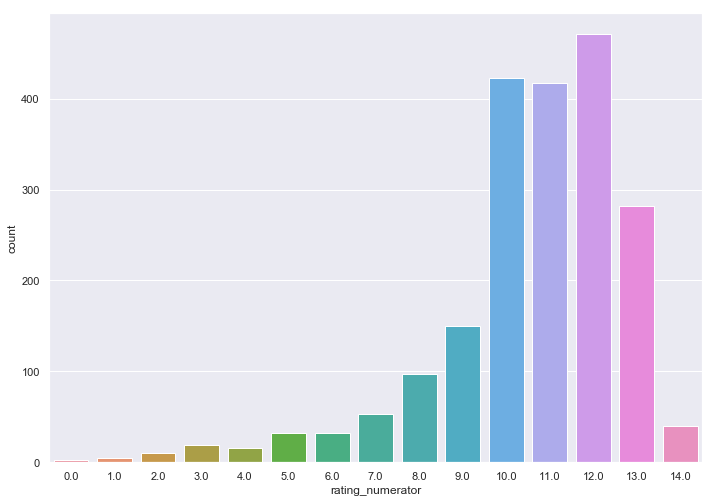

In [1217]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(round(twitter_archive_master.query('rating_numerator <15').rating_numerator))


the most common numerator is 12 

In [1179]:
twitter_archive_master.rating_denominator.describe()

count    2065.000000
mean     10.492494  
std      7.136139   
min      7.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

The mean rating is 10.492 and the first, second, and third quartile have a rating of 10. This confirms the presupposition that most of the values in the rating_denominator column are 10.

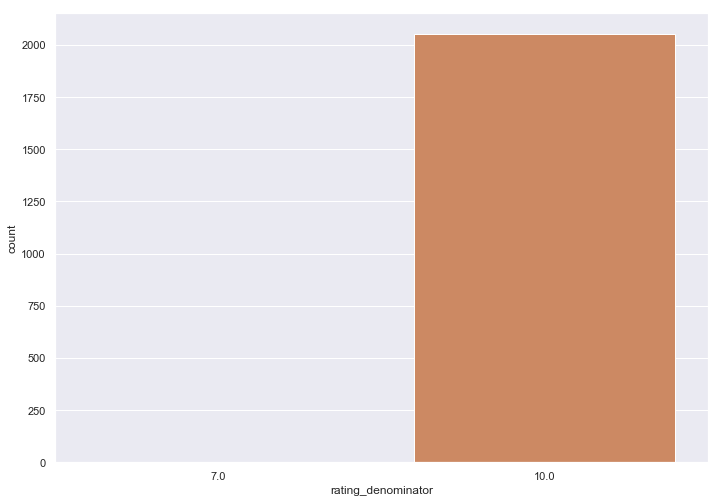

In [1180]:
sns.countplot(twitter_archive_master.query('rating_denominator < 20').rating_denominator)

Almost all the denominators are equal to 10

In [1183]:
#The numerator in proportion to the denominator
prop = (twitter_archive_master.rating_numerator/twitter_archive_master.rating_denominator )

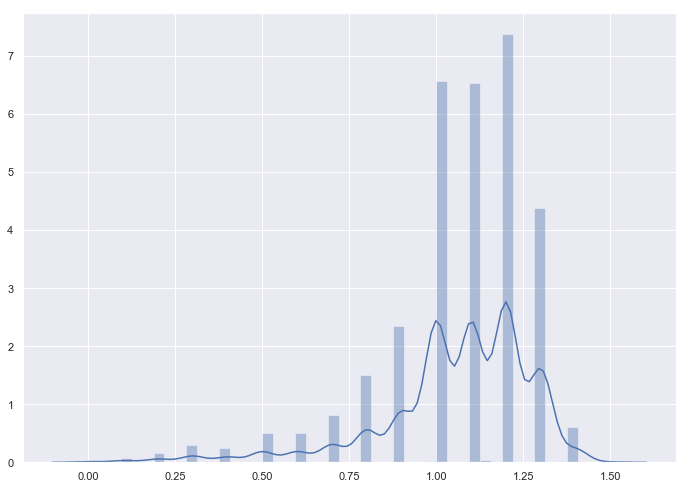

In [1222]:
sns.distplot(prop[prop<2])

The proportions follow a left skewed distribution with most of the ratings having a proportion equal to or greater than 1

Some of the ratings are not of dogs but rather of objects or other animals. Luckily a neural network was used to predict what is in the image. I am going to calculate the proportions of the ratings provided for the images that have a dog in them. I want to be sure that this image is of a dog, I am going to only use the rating if all three predictions state that the image is of a dog.

In [1192]:
#The rows that most likely than not have dogs
dogs = twitter_archive_master.query('p1_dog == True & p2_dog == True & p3_dog == True')

In [1194]:
dogs.shape[0]

1236

In [1195]:
dogs_prop = (dogs.rating_numerator/dogs.rating_denominator)

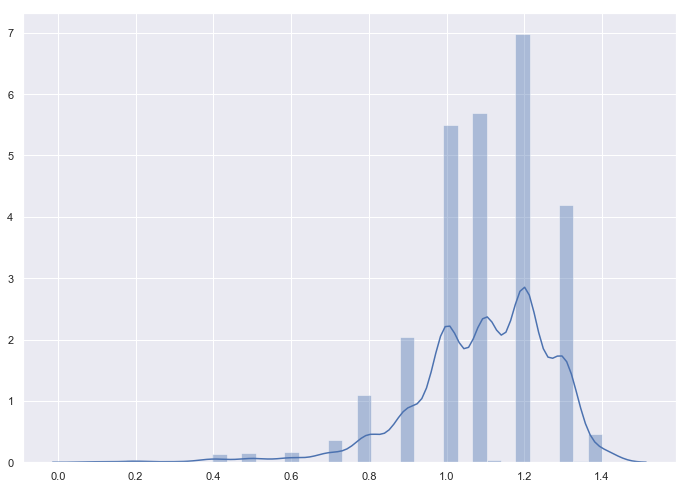

In [1227]:
sns.distplot(dogs_prop[dogs_prop<2])

##### ratings for each dog stage

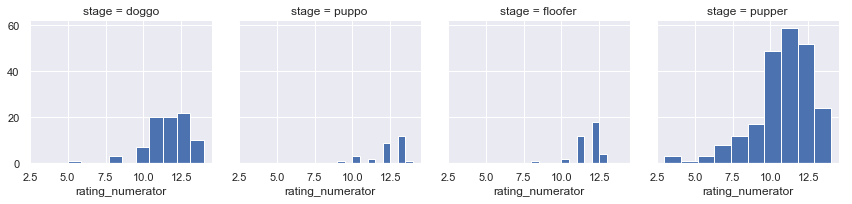

In [1351]:
#Facet the dog stages
rating = twitter_archive_master.query('rating_numerator < 15')
facet = sns.FacetGrid(rating, col = 'stage').map(plt.hist, 'rating_numerator')

In [1353]:
#value counts for dog stages
twitter_archive_master.stage.value_counts()

pupper     235
doggo      84 
floofer    38 
puppo      28 
Name: stage, dtype: int64

In [1365]:
#proportion column
twitter_archive_master['proportion'] = twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator

There are more tweets about dogs that are in the pupper stage followed by the doggo stage

In [1366]:
twitter_archive_master.groupby('stage').mean()['rating_numerator']

stage
doggo      14.154762
floofer    13.473684
pupper     13.432043
puppo      12.107143
Name: rating_numerator, dtype: float64

In [1367]:
#mean values for denominator
twitter_archive_master.groupby('stage').mean()['rating_denominator']

stage
doggo      11.904762
floofer    11.578947
pupper     12.510638
puppo      10.000000
Name: rating_denominator, dtype: float64

In [1368]:
#mean values for proportions
twitter_archive_master.groupby('stage').mean()['proportion']

stage
doggo      1.186905
floofer    1.157895
pupper     1.063630
puppo      1.210714
Name: proportion, dtype: float64

From the exploration above we see that there are more instance of pupper but doggo is rated better